In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
import imageio
import statsmodels.api as sm
import scipy
from itertools import product
import seaborn as sns
from numpy.random import seed
from numpy.random import randint
from numpy import mean
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import collections
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D ,Dense, Flatten ,  MaxPool2D , Input

In [65]:
def draw_corr(data,figsize = (12,12)):
    corr =data.corr()
    fig = plt.figure(figsize = figsize)
    # plt.matshow(correlations)
    plt.matshow(corr, cmap= 'RdBu', fignum=fig.number)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.grid(False)
    plt.colorbar()


def minmaxscalar_pd(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled,columns=df.columns)
    return df


In [66]:
data= pd.read_csv('weather1.csv')


In [67]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [69]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [70]:
data2 = data.copy()

In [71]:
data2['RainToday'] = data2['RainToday'].replace(['No','Yes'],[0,1])

In [72]:
data2['RainToday']

0      0
1      1
2      1
3      1
4      1
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainToday, Length: 366, dtype: int64

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [74]:
i = 'RainTomorrow'
data2[i] = data2[i].replace(['No','Yes'],[0,1])

In [75]:
data3 = data2.select_dtypes(include=np.number)

In [76]:
data3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [77]:
#discrete random variable
def get_frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies

def get_probabilities(sampledata, freqs):
    probabilities = []
    for k, v in freqs.items():
        probabilities.append(round(v / len(sampledata), 1))
    return probabilities



In [78]:
data["Cloud9am"]


0      7
1      5
2      8
3      2
4      7
      ..
361    1
362    0
363    3
364    6
365    1
Name: Cloud9am, Length: 366, dtype: int64

{7: 86, 5: 23, 8: 40, 2: 17, 4: 9, 6: 25, 1: 116, 0: 33, 3: 17}
prob [0.2, 0.1, 0.1, 0.0, 0.0, 0.1, 0.3, 0.1, 0.0]


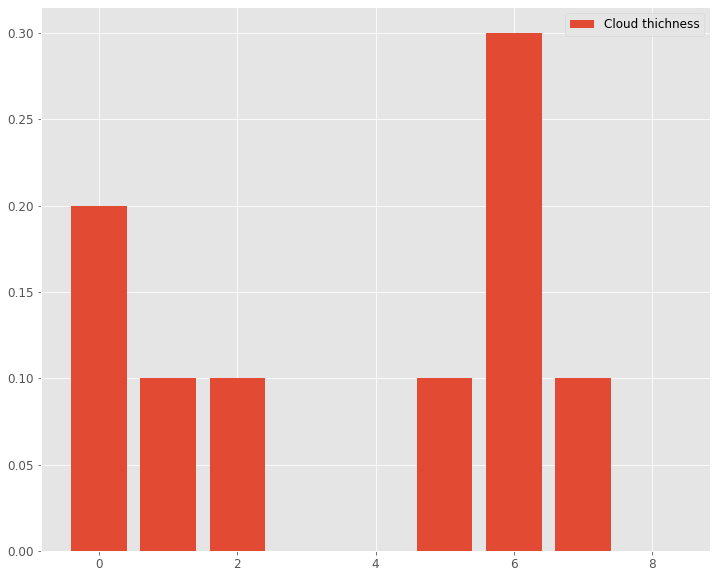

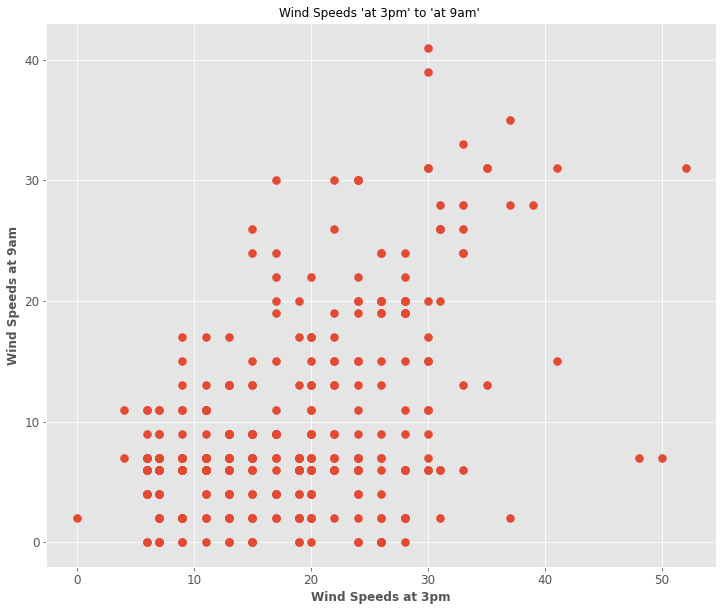

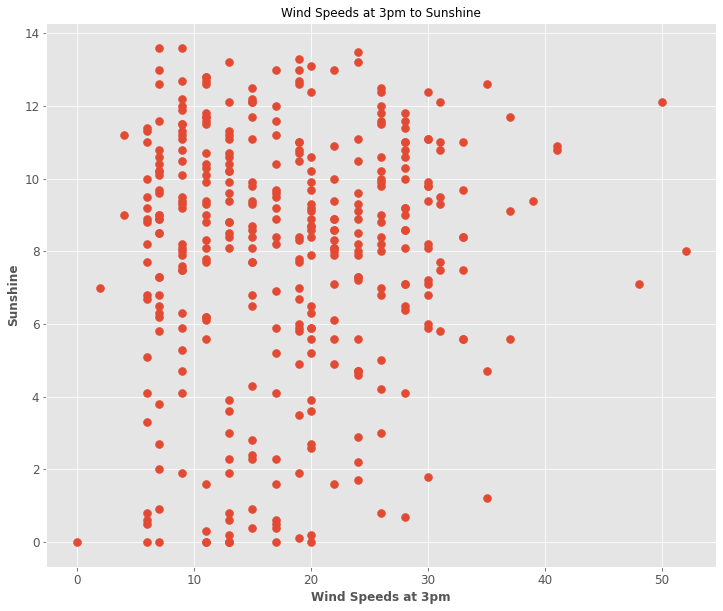

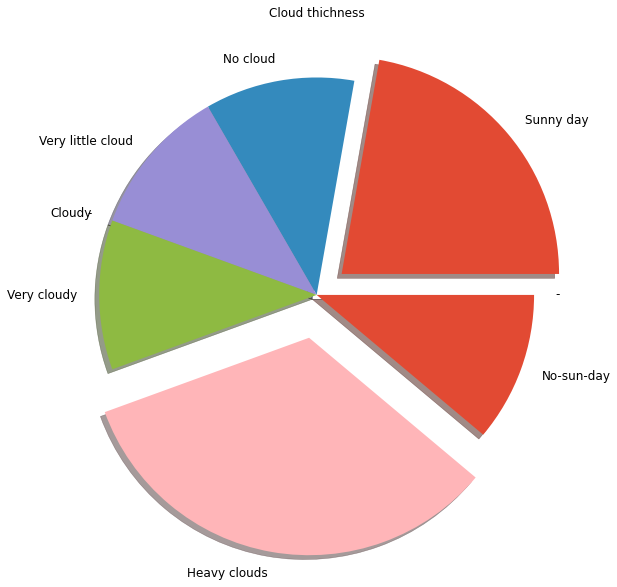

In [79]:

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']





sample = data["Cloud9am"]
calculated_frequencies = get_frequencies(sample)
print(calculated_frequencies)
calculate_probabilities = get_probabilities(sample, calculated_frequencies)
print("prob", calculate_probabilities)
x_axis = list(set(sample))

plt.bar(x_axis, calculate_probabilities)
plt.legend(["Cloud thichness"])
plt.show()

plt.scatter(data['WindSpeed3pm' ]  ,data[ "WindSpeed9am"] )
plt.title("Wind Speeds 'at 3pm' to 'at 9am' ")
plt.xlabel("Wind Speeds at 3pm")
plt.ylabel("Wind Speeds at 9am")
plt.show()


plt.scatter(data['WindSpeed3pm' ]  ,data[ "Sunshine"] )
plt.title("Wind Speeds at 3pm to Sunshine")
plt.xlabel("Wind Speeds at 3pm")
plt.ylabel("Sunshine")
plt.show()



mylabels= ["Sunny day","No cloud","Very little cloud","-","Cloudy","Very cloudy","Heavy clouds","No-sun-day","-"]
myexplode = [0.15,0,0,0,0,0,0.2,0,0]
plt.pie(calculate_probabilities,labels =mylabels,explode = myexplode, shadow = True)
plt.title("Cloud thichness")
plt.show()



The average probability of rain is 1.4284153005464482 %


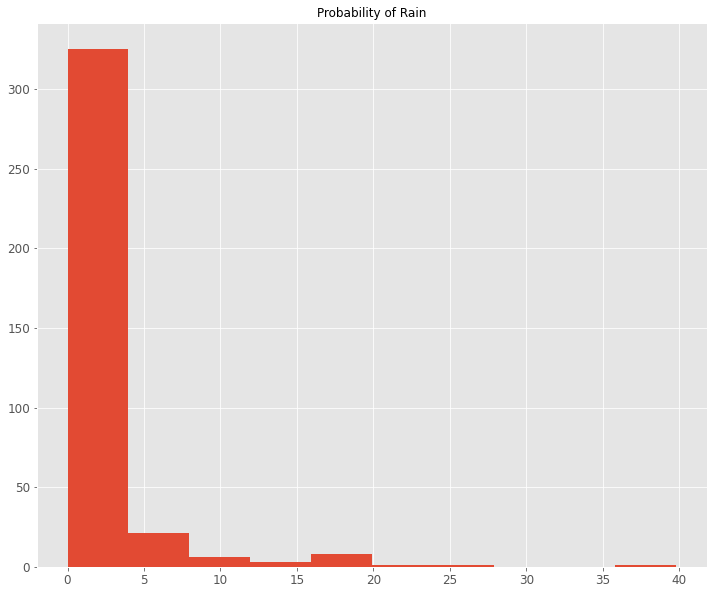

Statistics=0.38883382081985474, p=2.9762369019118345e-33
Sample does not look Normal(rejectH0)


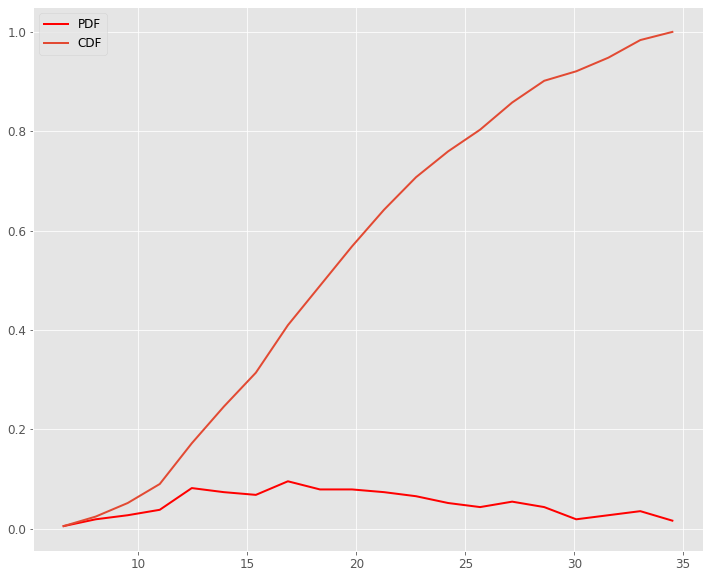

0.425


In [80]:
#Central limit theorem

# seed the random number generator, so that the experiment is #replicable
seed(1)
# generate a sample of men's weights
Rainfall = data['Rainfall']
# print(Rainfall)
print('The average probability of rain is {} %'.format(mean(Rainfall)))

plt.hist(Rainfall)
plt.title('Probability of Rain')
plt.show()
stat, p = shapiro(Rainfall)



print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal(rejectH0)')


# initializing 
Temp3pm = data['Temp3pm']

# getting data of the histogram
count, bins_count = np.histogram(Temp3pm, bins=20)

# finding the PDF of the histogram using count values
pdf = count / sum(count)

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

#NAIEVE BAYES
def bayesTheorem(pA, pB, pBA):
    return pA * pBA / pB
#define function for Bayes' theorem
def bayesTheorem(pA, pB, pBA):
    return pA * pBA / pB

#define probabilities
pRain = 0.2
pCloudy = 0.4
pCloudyRain = 0.85

#use function to calculate conditional probability
print(bayesTheorem(pRain, pCloudy, pCloudyRain))

In [81]:
data3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


C:\Users\Mario\AppData\Local\Temp\ipykernel_16792\3479777238.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


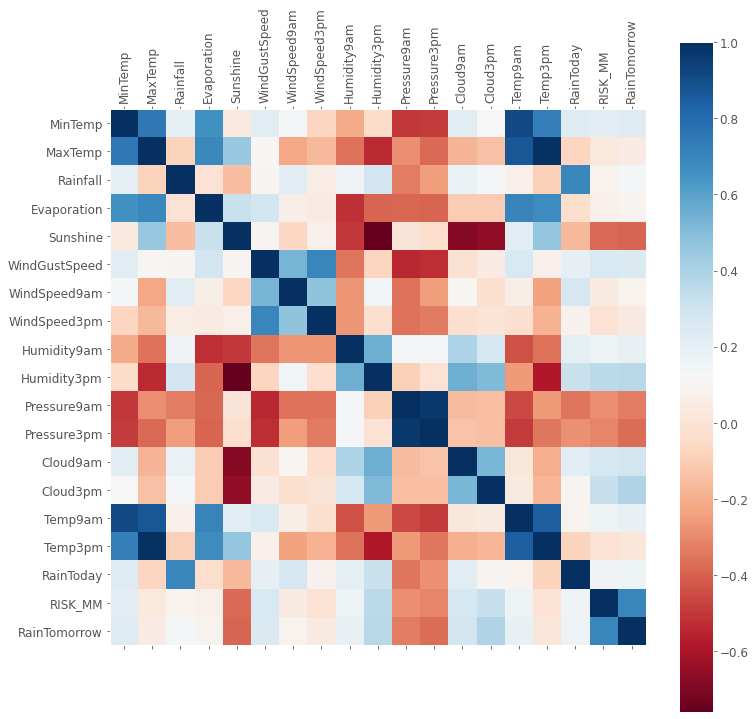

In [82]:
draw_corr(data3)

In [83]:
data3 = minmaxscalar_pd(data3)

In [84]:
outputs = data3["RainTomorrow"]
inputs = data3.drop(["RainTomorrow"], axis=1)

In [85]:
print(inputs.shape,outputs.shape)
inputs.head()

(366, 18) (366,)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.507634,0.592199,0.000000,0.235294,0.463235,0.200000,0.146341,0.384615,0.507937,0.192771,0.591837,0.500000,0.875,0.875,0.581301,0.629252,0.0,0.090452
1,0.736641,0.684397,0.090452,0.308824,0.713235,0.305882,0.097561,0.326923,0.698413,0.277108,0.405612,0.318681,0.625,0.375,0.707317,0.700680,1.0,0.090452
2,0.725191,0.560284,0.090452,0.411765,0.242647,0.847059,0.146341,0.115385,0.730159,0.674699,0.331633,0.285714,1.000,0.875,0.621951,0.513605,1.0,1.000000
3,0.709924,0.280142,1.000000,0.514706,0.669118,0.482353,0.731707,0.461538,0.412698,0.518072,0.229592,0.280220,0.250,0.875,0.544715,0.306122,1.0,0.070352
4,0.492366,0.301418,0.070352,0.397059,0.779412,0.435294,0.487805,0.538462,0.507937,0.433735,0.556122,0.596154,0.875,0.875,0.447154,0.350340,1.0,0.000000


In [86]:
y= outputs.to_numpy()
X = inputs.to_numpy()

In [87]:
len(X[np.isnan(X)])

12

In [88]:
X[np.isnan(X)] = 0

In [89]:
X[np.isnan(X)]

array([], dtype=float64)

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.23, random_state=42)

In [91]:
print([i.shape for i in [ X_train, X_test, y_train, y_test]])

[(281, 18), (85, 18), (281,), (85,)]


In [92]:
model_predict_rain_1 = Sequential(
     [               
        tf.keras.Input(shape=(18,)),    #specify input size
        Dense(25,activation='relu', name = 'layer1'),
        Dense(15,activation='relu', name = 'layer2'),
        Dense(2,activation='softmax', name = 'layer3')
        
    ], name = "rain_prediction" )

In [132]:
tf.keras.utils.enable_interactive_logging()
model_predict_rain_1.summary()

Model: "rain_prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                475       
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 2)                 32        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_predict_rain_1.compile(
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
    

In [129]:
epochs = 200
tf.get_logger().setLevel('WARNING')
tf.keras.utils.disable_interactive_logging()
model_predict_rain_1.fit(X_train, y_train ,   epochs=epochs,verbose=1, validation_split=0.2)
tf.keras.utils.enable_interactive_logging()

In [134]:
acc =model_predict_rain_1.evaluate(X_test,y_test)
print(f'accuracy = {acc[1]}')

3/3 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.9176
accuracy = 0.9176470637321472


In [119]:
model_predict_rain_2 = Sequential(
     [               
        tf.keras.Input(shape=(18,)),    #specify input size
        Dense(128,activation='relu'),
         Dense(64,activation='relu'),
        Dense(15,activation='relu'),
        Dense(2,activation='softmax')
        
    ], name = "rain_prediction2" )

In [120]:
model_predict_rain_2.summary()

Model: "rain_prediction2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2432      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 15)                975       
                                                                 
 dense_15 (Dense)            (None, 2)                 32        
                                                                 
Total params: 11,695
Trainable params: 11,695
Non-trainable params: 0
_________________________________________________________________


In [125]:

model_predict_rain_2.compile(
    
#     metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    optimizer=tf.keras.optimizers.Adam(0.0001),
)
    

In [135]:
epochs = 1000
tf.keras.utils.disable_interactive_logging()
model_predict_rain_2.fit(X_train, y_train ,   epochs=epochs,verbose=1, validation_split=0.2)
tf.keras.utils.enable_interactive_logging()

In [136]:
acc =model_predict_rain_2.evaluate(X_test,y_test)
print(f'accuracy = {acc[1]}')

3/3 [==============================] - 0s 4ms/step - loss: 0.4690 - sparse_categorical_accuracy: 0.9176
accuracy = 0.9176470637321472


In [137]:
y_preds = model_predict_rain_2.predict(X)

12/12 [==============================] - 0s 2ms/step


In [138]:
got_wrong= 0
for i in range(y.shape[0]):
    y_pred_value = np.where(y_preds[i]==np.max(y_preds[i]))[0][0]
    got_wrong += abs(y_pred_value-y[i])
    print(f'The Real Value is: {y[i]}\t The Predicted value is: {y_pred_value}')
print(f'got {got_wrong} wrong from {y.shape[0]} example')

The Real Value is: 1.0	 The Predicted value is: 1
The Real Value is: 1.0	 The Predicted value is: 1
The Real Value is: 1.0	 The Predicted value is: 1
The Real Value is: 1.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 1.0	 The Predicted value is: 1
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 1.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0
The Real Value is: 0.0	 The Predicted value is: 0


In [104]:
y_preds[211]

array([0.49364486, 0.5063551 ], dtype=float32)